In [1]:
import numpy as np
import pandas as pd
# import matplotlib as mlp
import matplotlib.pyplot as plt
import scipy.optimize as opt
# import sympy as sp
# sp.init_printing()
# import pint; u = pint.UnitRegistry()
%matplotlib notebook

# Generate Plots
# Data Analysis
# Data Regression
# Regression Statistics
# Optimization
# Tank Overflow
# Dynamic Simulation
# Other Tutorials

## Solve an equation

Here is the Colebrook-White equation used to calculate the friction factor for fluid flow in pipes:

$$\frac{1}{\sqrt{f}} = 1.14 - 2 log_{10}\left( \frac{\epsilon}{D} + \frac{9.35}{Re\sqrt{f}}\right)$$

As this equation cannot be solved explicitly it must be solved numerically. We will do this here. Given an $\epsilon$ of 0.1 mm and a diameter, $D$ of 4 cm and a Reynolds number $Re$ of 4500, calculate the friction factor ($f$) using this equation. (Answer is ~ 0.041)

In [2]:
def haaland(f, epsD, Re):
    left_side = 1/np.sqrt(f)
    right_side = 1.14 - 2 * np.log10(epsD + 9.35 / Re / np.sqrt(f))
    return left_side - right_side

ϵperD = .0001/.04
Re = 4500
solution = opt.fsolve(haaland, .01, args=(ϵperD, Re))
solution[0]

0.04115235538965335

## Data Parsing, Regression, Analysis, and Plotting

In [3]:
data = pd.read_excel("../docs/media/e_sections/correlation.xlsx", sheet_name="IO", skiprows=1)

In [4]:
data

,input,output
0,1,-210
1,7,-40
2,10,84
3,12,102
4,13,126
5,32,871
6,33,880
7,34,873
8,38,1173
9,39,1467


In [5]:
x, y = data['input'], data['output']

<IPython.core.display.Javascript object>


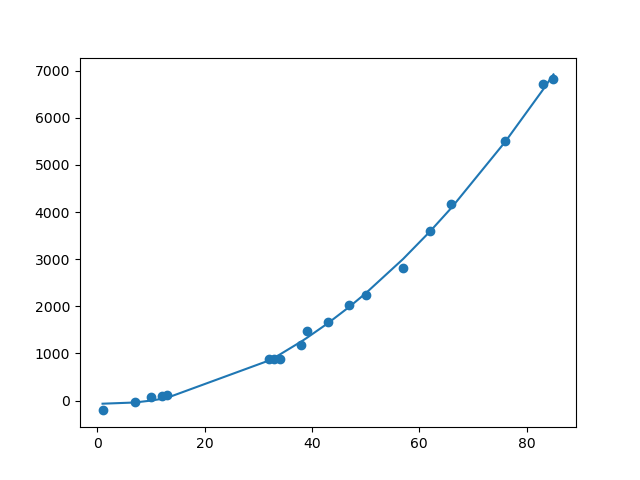

In [7]:
plt.scatter(x,y)
plt.plot(x, np.polyval(np.polyfit(x, y, 2), x))